In [1]:
import numpy as np
import pandas as pd

import pickle

import copy

import matplotlib.pyplot as plt

In [2]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(-1, '/mnt/x/Computation/Utilities')

import ocu_seaside.ocu_basics as se
import ocu_trident.ocu_tri_utils as tu
import ocu_binmeths as bm
import ocu_compass as co

import ocu_trident.ocu_deepstarr as ds
import ocu_trident.ocu_preassembled as pa
import ocu_oyster as oys

import os
os.chdir('/mnt/x/Computation/Projects/CS3-YY1/data/R2')

import torch
import torch.nn as nn
from torch.optim import Adam, AdamW

In [3]:
mainfolder = se.NewFolder('yy1_data')
fin_bins = se.PickleLoad(mainfolder + 'fin_bins')
print(fin_bins)

divset = ['Train', 'Stop.', ' Eval', 'Test']

10


In [4]:
yy1_split_transaug = se.PickleLoad(mainfolder + 'yy1_split_transaug')

yy1_max = se.PickleLoad(mainfolder + 'yy1_max')

tri_tpacks = se.PickleLoad(mainfolder + 'tri_tpacks')

d_x1, d_y_ms, d_s, d_b, d_x2 = tri_tpacks

d_s_rs = np.swapaxes(np.expand_dims(d_s, axis = -1), 1, -1)

In [5]:
masterpseudo = 1e-10

RMS_mode = [tu.MeanExpo, {'expo': 2, 'root': True}]
RMS_mode_pyt = [tu.MeanExpo, {'expo': 2, 'root': True, 'pyt': True}]

bm_args_np = {'byaxis': 1, 'useweights': False, 'seperate': False, 
              'summarize_mode': RMS_mode}

bm_args_pyt = {'byaxis': 1, 'useweights': False, 'seperate': False, 
               'summarize_mode': RMS_mode_pyt, 'pyt': True}

#------------------------------------------------

deverr_args_base = {'expo': 2, 'root': True, 
                    'pseudo': masterpseudo,
                    'scalefactor': yy1_max}

RMSDE_mode_np = [tu.DeviaError, {**deverr_args_base, 'pyt': False}]
RMSDE_mode_pyt = [tu.DeviaError, {**deverr_args_base, 'pyt': True}]  

B_RMSDE_mode_np = [tu.BinnedLoss, {'metrics_mode': RMSDE_mode_np, **bm_args_np}]
B_RMSDE_mode_pyt = [tu.BinnedLoss, {'metrics_mode': RMSDE_mode_pyt, **bm_args_pyt}]

In [6]:
d_y_ms_mean = np.mean(d_y_ms)
d_y_ms_mean_xpa = np.repeat(d_y_ms_mean, d_y_ms.shape[0]).reshape(d_y_ms.shape)
print(d_y_ms_mean)

#--------------------------------------------
d_y_ms_bind = [d_y_ms[d_b == i] for i in np.arange(fin_bins)]
d_y_ms_bind_mean = [np.mean(d, keepdims= True) for d in d_y_ms_bind]
d_y_ms_mom = np.mean(d_y_ms_bind_mean)
d_y_ms_mom_xpa = np.repeat(d_y_ms_mom, d_y_ms.shape[0]).reshape(d_y_ms.shape)

print(d_y_ms_mom)

#============================================

for x in [d_y_ms_mean_xpa, d_y_ms_mom_xpa]: 
    mex = B_RMSDE_mode_np[0](x, d_y_ms, std = d_s_rs, bind = d_b, 
                    ** B_RMSDE_mode_np[1])

    print(mex)

#+++++++++++++++++++++++++++++++++++++++++++++

d_y_ms_mean_sp = [np.mean(d_y_ms[s]) for s in yy1_split_transaug]
d_y_ms_mean_sp_xpa = [np.repeat(d_y_ms_mean_sp[iz], d_y_ms[z].shape[0]).reshape(d_y_ms[z].shape) 
                        for iz, z in enumerate(yy1_split_transaug)]
print(d_y_ms_mean_sp)


d_y_ms_sp_bind = [[d_y_ms[s][d_b[s] == i] for i in np.arange(fin_bins)] for s in yy1_split_transaug]
d_y_ms_sp_bind_mean = [[np.mean(d[i], keepdims= True) 
                        for i in np.arange(fin_bins)] 
                        for d in d_y_ms_sp_bind]

print(d_y_ms_sp_bind_mean) 
d_y_ms_sp_mom = [np.mean(d_y_ms_sp_bind_mean[iz]) for iz, z in enumerate(yy1_split_transaug)]
print(d_y_ms_sp_mom) 
d_y_ms_sp_mom_xpa = [np.repeat(d, d_y_ms[z].shape[0]).reshape(d_y_ms[z].shape) 
                    for z,d in zip(yy1_split_transaug, d_y_ms_sp_mom)]



for x in [d_y_ms_mean_sp_xpa, d_y_ms_sp_mom_xpa]:
    for iz, z in enumerate(yy1_split_transaug):

        mex = B_RMSDE_mode_np[0](x[iz], d_y_ms[z], std = d_s_rs[z], bind = d_b[z], 
                        ** B_RMSDE_mode_np[1])

        print(mex)

# print(d_y_ms_mom)

0.015893282
0.25834477
22.308273110898273
10.265206110288915
[np.float32(0.016669521), np.float32(0.018074794), np.float32(0.011771729), np.float32(0.014987123)]
[[array([0.00721407], dtype=float32), array([0.05568025], dtype=float32), array([0.09851599], dtype=float32), array([0.14139737], dtype=float32), array([0.19063948], dtype=float32), array([0.2440531], dtype=float32), array([0.30516747], dtype=float32), array([0.38254878], dtype=float32), array([0.4881846], dtype=float32), array([0.67247105], dtype=float32)], [array([0.00721983], dtype=float32), array([0.05559878], dtype=float32), array([0.0996116], dtype=float32), array([0.14216818], dtype=float32), array([0.19122344], dtype=float32), array([0.23924538], dtype=float32), array([0.29826853], dtype=float32), array([0.385225], dtype=float32), array([0.4925386], dtype=float32), array([0.68055236], dtype=float32)], [array([0.0056862], dtype=float32), array([0.05475389], dtype=float32), array([0.10015788], dtype=float32), array([0.14

In [7]:
flipo = [[-2, -1], [-2, -1]]

TT_args =  {'loss_mode': B_RMSDE_mode_pyt, 'loss_bind': True, 
            'metrics_mode': B_RMSDE_mode_np, 'smallest': True,

            'batchsize': 128, 'opt': Adam, 'learningrate': 0.002, 'maxepochs': 100, 
            'patience': 8, 'pickup': True,

            'flips': flipo, #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            'indivflips': True}


#-------------------------------------------------

# RANDOM OPT ARGS: #

TT_args_RO = TT_args.copy() 
TT_args_RO.update({'inps': [d_x1, d_x2], 'out': d_y_ms, 
                   'out_std': d_s_rs, 'out_bind': d_b,
                   'Split': yy1_split_transaug,                                   ##########
                   'EUS': 0.1, 'obs_weight': d_b.reshape(-1)})               ##########

#----------------------------------------

TCS_args_RO = {'trainer': tu.TridentTrainer, 
               #'trainer_args': TT_args_RO, # NEED TO DO THIS FOR EACH MODEL FOR DUDS.  
               'smallest': None,
               'get_predictions': True, 'pred_rewrite': False, 
               'add_pred_args': {'batchsize': 512, 'flips': flipo, 'avg_flips': True},
               'score_on': 2, 'score_only': True} ### SCORING ON THE EVAL SET, MAKING ONMLY PREDS FOR IT. 


########################

base_dict = {'batchsize': [[128, 256, 512], 'cat'], 
                'learningrate': [se.GeomNumSpacing(0.0001, 0.01, 15, plier = 1.2), 'cat']} ####################

######################

budget = 200                                        #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

RO_repeats = 1

RO_args_shared = {
           'data': None, ######################
           'Splits': None, ####################
           'budget': budget, 'repeats': RO_repeats, 
           #'CS_mode': [tu.TridentCanScorer, TCS_args_RO], # NEED TO SET THIS INDIV FOR DUDS. 
           'pickup': True, 'savemodels': True}

#---------------------------------------------------------------------------

TC_repeats = 10

TCR_args_RO = {'Splits': None, 'repeats': TC_repeats,
               'pickup': False, 'savemodels': True, 'returnmodel': True}

#---------------------------------------------------------------------------

# en_y, en_s_rs, en_b = [x[yy1_split_transaug[2]] for x in [d_y_ms, d_s_rs, d_b]]
# en_split = [np.arange(len(en_y))]

# es_args = {'out': en_y, 'out_std': en_s_rs, 'out_bind': en_b,
#             'split': en_split,
#            'metrics_mode': B_RMSDE_mode_np, 
#            'score_on': 0,
#            'std_cutoff': None, 'ddof': 1, 
#             'top': 3, 'smallest': True}                    

In [8]:
def Reset_DualOyster(dualoyster):
    #ds consists of a "conv" and a "dense" module. Need to go through each one, see if its a conv and reset if so. 

    for oyster in [dualoyster.OysterA, dualoyster.OysterB]: 
        lke, los = len(oyster.kE), len(oyster.O)

        for i in np.arange(lke): 
            if isinstance(oyster.kE[i], nn.Conv2d): 
                oyster.kE[i].reset_parameters()
        
        for i in np.arange(los): 
            if isinstance(oyster.O[i], nn.Conv2d): 
                oyster.O[i].reset_parameters()
        print('done reset mod')

    return dualoyster

def GetTopofTop(pn_RO, algo, 
                duds_mode = [Reset_DualOyster, {}], 
                rewrite = False): 

    topcan = co.TopCan(pn_RO, num_top = 5, 
                       reduce_func = np.min, smallest = True, perround = False)
 
    topcan_cd = co.TopCanDict(pn_RO, topcan, comb_rounds = True)

    pn_RO_top = se.NewFolder(pn_RO + 'Top' + str(0))

    #----------------------------------------------------

    TT_args_TC = {'duds_mode': duds_mode, 'duds': 10, **TT_args_RO}

    TC_repeats = 10
    
    TCR_args_RO = {'Splits': None, 'repeats': TC_repeats,
                   'pickup': False, 'savemodels': True, 'returnmodel': True}


    TCS_args_TC = {'trainer': tu.TridentTrainer, 'smallest': None,
                   'trainer_args': TT_args_TC,
                   
                   'get_predictions': True, 'pred_rewrite': False, 
                   'add_pred_args': {'batchsize': 512, 'flips': flipo, 'avg_flips': True},
                   'score_on': 1, 'score_only': False}    

    for no, ca in topcan_cd.items():
    
        pn_t = se.NewFolder(pn_RO_top + no)
        
        TCR_args_rep = {**TCR_args_RO, **TCS_args_TC, 'pathname': pn_t}
        
        _, _= tu.TridentCanRepeater(algo, ca, data = None, **TCR_args_rep)

    
    #=================================================================

    es_args = {'out': d_y_ms, 'out_std': d_s_rs, 'out_bind': d_b,
                'split': yy1_split_transaug,
                'metrics_mode': B_RMSDE_mode_np, 'score_on': 1,
                'std_cutoff': None, 'ddof': 1, 'top': 3, 'smallest': True}  

    boots_scores = []

    for no, ca in topcan_cd.items():
        
        pn_t = se.NewFolder(pn_RO_top + no)

        pn_preds = [pn_t + '0_' + str(ir) + '_Preds' + '.p' ###################
                    for ir in range(TC_repeats)]
        
        pn_e = pn_t + 'boots_ensemb'

        if os.path.isfile(pn_e + '.p') and rewrite is False: 
            boots_ensemb = se.PickleLoad(pn_e)
        else: 
            boots_ensemb = co.Bootstrapper(pn_preds, mode = [co.EnsembleScorer, es_args],
                                            iters = 100, updates = 10, return_idx = True)
            se.PickleDump(boots_ensemb, pn_e)  

        boots_scores.append(boots_ensemb[0])
    
    boots_scores = np.array(boots_scores)


    boots_means = np.mean(boots_scores, axis = 1)
    boots_means_eval = boots_means[:, 2]
    print(boots_means_eval)
    sortxo = np.argsort(boots_means_eval)
    sortxo_keys = np.array(list(topcan_cd.keys()))[sortxo]
    ranked_can_dict = {ix: topcan_cd[x] for ix, x in enumerate(sortxo_keys)}

    #se.PickleDump(ranked_can_dict, pn_RO_top + 'ranked_can_dict')

    return ranked_can_dict

In [9]:
DualOyster_BaseDict = {'A_dim_i': [[(1,249,4)],'cat'], 
                      'B_dim_i': [[(11,40,1)],'cat'],
                      'dim_f': [[(2,1,1)],'cat'], 

                      'A_kE_ck_grouped': [[True, False], 'cat'], #NEED TO BE SET
                      'A_DS': [[True, False], 'cat'],
                      'A_kE_k': [[12, 20], 'int'], 
                      'A_kE_cf_m': [[50, 150], 'int'],
                      'A_kE_cf_ns': [[1, 1.1, 1.2], 'cat'],
                      'A_kE_ck_base': [[4, 5, 6, 7, 8, None], 'cat'], 
                      'A_kE_OneByOne': [[True, False], 'cat'],
                      'A_P_ck': [[6, 20], 'int'],
                      
                      'B_kE_ck_grouped': [[True, False], 'cat'], #NEED TO BE SET
                      'B_DS': [[True, False], 'cat'],
                      'B_kE_k': [[12, 20], 'int'], 
                      'B_kE_cf_m': [[50, 150], 'int'],
                      'B_kE_cf_ns': [[1, 1.1, 1.2], 'float'],
                      'B_kE_ck_base': [[4, 5, 6, 7, 8, None], 'cat'], 
                      'B_kE_OneByOne': [[True, False], 'cat'],
                      'B_P_ck': [[6, 20], 'int'],

                      'DS_wwp_func': [[nn.MaxPool2d], 'cat'],
                      'DS_act': [[False], 'cat'],

                      'P_center': [[True, False], 'cat'],

                      'O_mods': [[None], 'cat'],
                      'O_mods_ns': [[0.5], 'cat'],
                      'O_cf_pu_m': [[None], 'cat'],
                      'O_cf_ns': [[1, 1.1, 1.2], 'cat'],
                      'O_ck_base': [[None], 'cat'],
                      'O_pool_k2s': [[0, 0.5], 'cat'],
                      'O_pool_func': [[nn.MaxPool2d], 'cat'],
                      'O_actb4pool': [[True], 'cat'],
                      'O_dropout': [[0, 0.2], 'cat'],


                      'activations': [[nn.ReLU(), nn.LeakyReLU()], 'cat'],
                      'batchnorm': [[None, 'before'], 'cat']}

#============================================================

optdict = {**DualOyster_BaseDict, **base_dict}

optdict.update({
    'A_dim_i': [[d_x1.shape[1:]],'cat'],
    'B_dim_i': [[d_x2.shape[1:]],'cat'],
    'dim_f': [[d_y_ms.shape[1:]],'cat'],

    'A_kE_ck_grouped': [[False], 'cat'], 

    'A_DS': [[False], 'cat'],                               #!!!!!!!!!!!!!!     
    'A_kE_k': [[11, 13, 15], 'cat'], 
    'A_kE_cf_m': [[50, 150, 250], 'cat'],
    'A_kE_cf_ns': [[1, 1.15, 1.3], 'cat'],
    'A_kE_ck_base': [[None, 7, 9], 'cat'],
    'A_kE_OneByOne': [[True, False], 'cat'],
    'A_P_ck': [[1, 25, 50, 100], 'cat'],

    'B_kE_ck_grouped': [[True], 'cat'], #DOESNT MATTER
    
    'B_DS': [[False], 'cat'],
    'B_kE_k': [[5, 10, 15], 'cat'], 
    'B_kE_cf_m': [[10, 20, 30], 'cat'],
    'B_kE_cf_ns': [[1, 1.15, 1.3], 'cat'],
    'B_kE_ck_base': [[None, 5, 7, 9], 'cat'],
    'B_kE_OneByOne': [[True, False], 'cat'],
    'B_P_ck': [[1, 5, 10], 'cat'],                   #!!!!!!!!!!!!!!
    
    'P_center': [[False, True], 'cat'],

    'O_dropout': [[0, 0.2], 'cat'],
    
    'O_mods': [[0], 'cat'],

    'O_dropout': [[0, 0.2], 'cat'],

    #################### THE FOLLOWING DO NOT MATTER:

    'O_mods_ns': [[0.5], 'cat'],
    'O_cf_pu_m': [[None], 'cat'],
    'O_cf_ns': [[1], 'cat'],
    'O_ck_base': [[None], 'cat'],
    'O_pool_k2s': [[0], 'cat'],
    'O_pool_func': [[nn.MaxPool2d], 'cat'],
    'O_actb4pool': [[True], 'cat']})

In [10]:
modo = oys.DualOyster

TT_args_RO_oys = {'duds_mode': [Reset_DualOyster, {}], 'duds': 10,
                 **TT_args_RO}
TCS_args_RO_oys = {'trainer_args': TT_args_RO_oys,
                  **TCS_args_RO}

#--------------------------------------

RO_args_oys = {'algo': modo,
              'CS_mode': [tu.TridentCanScorer, TCS_args_RO_oys],
                **RO_args_shared}

# Exact

In [11]:
optdict_exact = copy.deepcopy(optdict)

optdict_exact.update({'O_mods': [[0], 'cat'],
                      
                    #################### THE FOLLOWING DO NOT MATTER:

                    'O_mods_ns': [[0.5], 'cat'],
                    'O_cf_pu_m': [[None], 'cat'],
                    'O_cf_ns': [[1], 'cat'],
                    'O_ck_base': [[None], 'cat'],
                    'O_pool_k2s': [[0], 'cat'],
                    'O_pool_func': [[nn.MaxPool2d], 'cat'],
                    'O_actb4pool': [[True], 'cat']})

In [12]:
oys_folder = se.NewFolder('Oyster')

oys_iter = 11

pn_RO_oys = se.NewFolder(oys_folder + 'RO_' + str(oys_iter))

In [13]:
ROO_oys = co.RandomOpt(**RO_args_oys, 
                       VarDict = optdict_exact, pathname = pn_RO_oys)

{0: {0: {0: np.float64(6.053819566595472)}}, 1: {0: {0: np.float64(5.841409100867844)}}, 2: {0: {0: np.float64(5.591365391840631)}}, 3: {0: {0: np.float64(3.714976486077722)}}, 4: {0: {0: np.float64(3.5159822642167544)}}, 5: {0: {0: np.float64(5.604719381964225)}}, 6: {0: {0: np.float64(5.889943214518365)}}, 7: {0: {0: np.float64(6.116185528746612)}}, 8: {0: {0: np.float64(84.47103327610326)}}, 9: {0: {0: np.float64(6.020622419675992)}}, 10: {0: {0: np.float64(6.096102122459192)}}, 11: {0: {0: np.float64(5.442394751852653)}}, 12: {0: {0: np.float64(13.240332690950115)}}, 13: {0: {0: np.float64(5.711572400376335)}}, 14: {0: {0: np.float64(5.500905108741471)}}, 15: {0: {0: np.float64(6.784154292423523)}}, 16: {0: {0: np.float64(5.709453826517666)}}, 17: {0: {0: np.float64(5.506595915088782)}}, 18: {0: {0: np.float64(5.7672267850795045)}}, 19: {0: {0: np.float64(135.45722653084687)}}, 20: {0: {0: np.float64(3.7786378199533446)}}, 21: {0: {0: np.float64(7.758395419731611)}}, 22: {0: {0: np

In [15]:
rankedo = GetTopofTop(pn_RO_oys, modo, 
                      duds_mode = [Reset_DualOyster, {}], 
                      rewrite = False)

se.PickleDump(rankedo, pn_RO_oys + 'ranked_can_dict')

 Cross val 1 of 1, Repeat 1 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.243269259868031
 Cross val 1 of 1, Repeat 2 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
5.107699047076804
 Cross val 1 of 1, Repeat 3 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
5.652027959406078
 Cross val 1 of 1, Repeat 4 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.043818691969038
 Cross val 1 of 1, Repeat 5 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.214067482959418
 Cross val 1 of 1, Repeat 6 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.422703843892806
 Cross val 1 of 1, Repeat 7 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.314672962541829
 Cross val 1 of 1, Repeat 8 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
4.17923049686865
 Cross val 1 of 1, Repeat 9 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) (220, 36, 1)
3.9542593394171734
 Cross val 1 of 1, Repeat 10 of 10
(1, 500, 4) (250, 486, 1)
(11, 40, 1) 

In [16]:
rankedo[0]

{'A_dim_i': (1, 500, 4),
 'B_dim_i': (11, 40, 1),
 'dim_f': (1, 1, 1),
 'A_kE_ck_grouped': False,
 'A_DS': False,
 'A_kE_k': 15,
 'A_kE_cf_m': 150,
 'A_kE_cf_ns': 1.15,
 'A_kE_ck_base': 7,
 'A_kE_OneByOne': True,
 'A_P_ck': 50,
 'B_kE_ck_grouped': True,
 'B_DS': False,
 'B_kE_k': 10,
 'B_kE_cf_m': 30,
 'B_kE_cf_ns': 1,
 'B_kE_ck_base': 9,
 'B_kE_OneByOne': True,
 'B_P_ck': 5,
 'DS_wwp_func': torch.nn.modules.pooling.MaxPool2d,
 'DS_act': False,
 'P_center': True,
 'O_mods': 0,
 'O_mods_ns': 0.5,
 'O_cf_pu_m': None,
 'O_cf_ns': 1,
 'O_ck_base': None,
 'O_pool_k2s': 0,
 'O_pool_func': torch.nn.modules.pooling.MaxPool2d,
 'O_actb4pool': True,
 'O_dropout': 0.2,
 'activations': ReLU(),
 'batchnorm': 'before',
 'batchsize': 256,
 'learningrate': np.float64(0.00671949253976686)}

# Non Exact

In [17]:
optdict_ne = copy.deepcopy(optdict)

optdict_ne.update({'O_mods': [[2, 3], 'cat'],
                    'O_mods_ns': [[0, 0.3, 0.5], 'cat'],
                    'O_cf_pu_m': [[1], 'cat'],
                    'O_cf_ns': [[1], 'cat'],
                    'O_ck_base': [[3, 5], 'cat'],
                    'O_pool_k2s': [[0.5], 'cat'],
                    'O_pool_func': [[nn.MaxPool2d], 'cat'],
                    'O_actb4pool': [[True], 'cat']})

In [18]:
ne_folder = se.NewFolder('neter')

ne_iter = 11

pn_RO_ne = se.NewFolder(ne_folder + 'RO_' + str(ne_iter))

In [19]:
ROO_ne = co.RandomOpt(**RO_args_oys, 
                       VarDict = optdict_ne, pathname = pn_RO_ne)

{0: {0: {0: np.float64(4.863062218899112)}}, 1: {0: {0: np.float64(5.998567034163008)}}, 2: {0: {0: np.float64(6.3781893729484)}}, 3: {0: {0: np.float64(6.2101108929384985)}}, 4: {0: {0: np.float64(6.129360331934509)}}, 5: {0: {0: np.float64(5.610576412630549)}}, 6: {0: {0: np.float64(6.173528134516517)}}, 7: {0: {0: np.float64(6.855741920480608)}}, 8: {0: {0: np.float64(5.890491416294675)}}, 9: {0: {0: np.float64(3.8169115510278986)}}, 10: {0: {0: np.float64(5.407448280765756)}}, 11: {0: {0: np.float64(5.574333333576667)}}, 12: {0: {0: np.float64(5.675741829222865)}}, 13: {0: {0: np.float64(5.698507592372613)}}, 14: {0: {0: np.float64(3.685435487498009)}}, 15: {0: {0: np.float64(5.439350326329895)}}, 16: {0: {0: np.float64(6.202571306379211)}}, 17: {0: {0: np.float64(5.519571768623336)}}, 18: {0: {0: np.float64(6.654821238104094)}}, 19: {0: {0: np.float64(7.169865256616204)}}, 20: {0: {0: np.float64(6.618762099316944)}}, 21: {0: {0: np.float64(5.436990542717231)}}, 22: {0: {0: np.floa

In [20]:
rankedo = GetTopofTop(pn_RO_ne, modo, rewrite = False)

se.PickleDump(rankedo, pn_RO_ne + 'ranked_can_dict')

 Cross val 1 of 1, Repeat 1 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.7548050384890677
 Cross val 1 of 1, Repeat 2 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
4.008286223221429
 Cross val 1 of 1, Repeat 3 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.991950100622715
 Cross val 1 of 1, Repeat 4 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.7399714753103184
 Cross val 1 of 1, Repeat 5 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.773935109999665
 Cross val 1 of 1, Repeat 6 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.464546401647387
 Cross val 1 of 1, Repeat 7 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.481529859708362
 Cross val 1 of 1, Repeat 8 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.781388148056276
 Cross val 1 of 1, Repeat 9 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1) (110, 26, 1)
3.782734314239446
 Cross val 1 of 1, Repeat 10 of 10
(1, 500, 4) (250, 488, 1)
(11, 40, 1

In [21]:
rankedo

{0: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_kE_ck_grouped': False,
  'A_DS': False,
  'A_kE_k': 13,
  'A_kE_cf_m': 150,
  'A_kE_cf_ns': 1.3,
  'A_kE_ck_base': 9,
  'A_kE_OneByOne': True,
  'A_P_ck': 25,
  'B_kE_ck_grouped': True,
  'B_DS': False,
  'B_kE_k': 15,
  'B_kE_cf_m': 20,
  'B_kE_cf_ns': 1,
  'B_kE_ck_base': 7,
  'B_kE_OneByOne': True,
  'B_P_ck': 10,
  'DS_wwp_func': torch.nn.modules.pooling.MaxPool2d,
  'DS_act': False,
  'P_center': False,
  'O_mods': 2,
  'O_mods_ns': 0,
  'O_cf_pu_m': 1,
  'O_cf_ns': 1,
  'O_ck_base': 3,
  'O_pool_k2s': 0.5,
  'O_pool_func': torch.nn.modules.pooling.MaxPool2d,
  'O_actb4pool': True,
  'O_dropout': 0,
  'activations': LeakyReLU(negative_slope=0.01),
  'batchnorm': None,
  'batchsize': 256,
  'learningrate': np.float64(0.008210632294418286)},
 1: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_kE_ck_grouped': False,
  'A_DS': False,
  'A_kE_k': 13,
  'A_kE_cf_m': 250,
  'A_

In [14]:
pn_RO_noass = NewFolder(moved + 'RO_noass')

NameError: name 'NewFolder' is not defined

In [ ]:
Dual_Oyster_RO_noass = Dual_Oyster_v5_basic.copy()

Dual_Oyster_RO_noass.update({

    'A_dim_i': [[dx1.shape[1:]],'cat'],
    'B_dim_i': [[dx2.shape[1:]],'cat'],
    'dim_f': [[dy.shape[1:]],'cat'],

    'A_H_grouped': [[False], 'cat'], #DOESNT MATTER
    'B_H_grouped': [[True], 'cat'], # WE WANT GROUPED NOW! 
    
    'A_doublestrand': [[True, False], 'cat'],
    'A_joint': [[True, False], 'cat'], 
    'A_siamese': [[False], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!

    'A_H_filt_m': [[50, 250], 'int'],
    'A_H_base_kernel': [[0, 5, 6, 7, 8], 'cat'],
    
    'A_C_pos': [[0, 25, 50, 100, 150], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@
    'A_D_num_mods': [[0], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@
    'A_D_ns_filters': [[0], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@

    'B_doublestrand': [[True, False], 'cat'],
    'B_joint': [[False], 'cat'], ################# NEVER JOINT FOR SINGLE SIGNAL. 
    'B_siamese': [[False], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!

    'B_H_size': [[5, 20], 'int'], 
    'B_H_filt_m': [[10, 50], 'int'],

    'B_H_base_kernel': [[0, 5], 'cat'],

    'B_C_pos': [[0, 1, 2, 3], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@
    'B_D_num_mods': [[0], 'cat'],#############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@
    'B_D_ns_filters': [[0], 'cat'], #############################!!!!!!!!!!!!!!!!!!!!!!!!!@@@@@@@@@@@@@@@@@@@@@@@

    'batchsize': [[256, 512], 'cat'], #############################
    'learningrate': [GeomSpacing_v2(0.0005, 0.005, 10, plier = 1.5), 'cat']}) ####################

GeomSpacing_v2(0.0005, 0.005, 10, plier = 1.5)
# Previous trial learning rate used: GeomSpacing_v2(0.0001, 0.1, 10, plier = 2). 
# Found that most learning rates bad, between 0.0005 and 0.005 good. 

array([0.0005    , 0.00056009, 0.00065023, 0.00078543, 0.00098824,
       0.00129245, 0.00174876, 0.00243323, 0.00345994, 0.005     ])

In [ ]:
Dual_Oyster_RO_noass

{'A_dim_i': [[(1, 500, 4)], 'cat'],
 'B_dim_i': [[(11, 80, 1)], 'cat'],
 'dim_f': [[(1, 1, 1)], 'cat'],
 'A_H_grouped': [[False], 'cat'],
 'B_H_grouped': [[True], 'cat'],
 'A_doublestrand': [[True, False], 'cat'],
 'A_joint': [[True, False], 'cat'],
 'A_siamese': [[False], 'cat'],
 'A_H_size': [[12, 20], 'int'],
 'A_H_filt_m': [[50, 250], 'int'],
 'A_H_ns_filters': [[1, 1.2], 'float'],
 'A_H_base_kernel': [[0, 5, 6, 7, 8], 'cat'],
 'A_H_1x1': [[True, False], 'cat'],
 'A_C_pos': [[0, 25, 50, 100, 150], 'cat'],
 'A_D_num_mods': [[0], 'cat'],
 'A_D_ns_filters': [[0], 'cat'],
 'B_doublestrand': [[True, False], 'cat'],
 'B_joint': [[False], 'cat'],
 'B_siamese': [[False], 'cat'],
 'B_H_size': [[5, 20], 'int'],
 'B_H_filt_m': [[10, 50], 'int'],
 'B_H_ns_filters': [[1, 1.2], 'float'],
 'B_H_base_kernel': [[0, 5], 'cat'],
 'B_H_1x1': [[True, False], 'cat'],
 'B_C_pos': [[0, 1, 2, 3], 'cat'],
 'B_D_num_mods': [[0], 'cat'],
 'B_D_ns_filters': [[0], 'cat'],
 'C_pool_func': [[torch.nn.modules.pool

In [ ]:
# #ALLLLLL GOOOOODDD

# shins, shout = [[10, *dx1.shape[1:]], [10, *dx2.shape[1:]]], (10, *dy.shape[1:]) #<- has to be a tuple... 

# workz, noworks = MakeSureWorks(Dual_Oyster_v5, Dual_Oyster_RO_noass, shins, shout, 
#                                multi_in = True, 
#                                cands = 100, 
#                                notmodel = ['batchsize', 'learningrate']) 

# noworks[:10]

In [ ]:
budget = 150

RO_repeats = 3

RO_args_noass = {'algo': Dual_Oyster_v5, 'VarDict': Dual_Oyster_RO_noass, 
           'data': [dx1, dx2, dy, db], 
           'Splits': yy1_split_transaug, #Doing epoch undersampling so full split. 
           'budget': budget, 'repeats': RO_repeats, 
           'CS_mode': [TridentCanScorer, {'trainer': Trainer_basic, 
                                          'trainer_args': TB_args_RO}], 
           'pickup': True, 'pathname': pn_RO_noass, 'savemodels': True}

In [ ]:
ROO_noass = RandomOpt(**RO_args_noass)

### Predictions 

In [ ]:
ROO_noass_metro = PickleLoad(pn_RO_noass + '0/Mets')

upto = 300

noass_metro = copy.deepcopy(ROO_noass_metro)

[noass_metro.pop(k, None) for k in np.arange(budget)[upto:]]

repos = 2

cansbest_idx = np.array([np.argsort([v[0][r] for r in np.arange(RO_repeats)])[:repos] for k,v in noass_metro.items()])
cansbest_idx[:5]

array([[1, 0],
       [1, 0],
       [2, 1],
       [1, 2],
       [2, 0]])

In [ ]:
noass_cansbests_allmets_comb = []

for k, dos in zip(noass_metro.keys(), cansbest_idx):

    pn_ts = [NewFolder(pn_RO_noass + '0') + str(k) + '_0_' + str(b) for b in dos]
    pn_preds, pn_mods = [[pn_t + s for pn_t in pn_ts] for s in ['_preds.p',  '_Mod.pt']]

    _ = TridentPredMulti(pn_mods, [dx1, dx2],
                         pn_preds = pn_preds, 
                         flips = [[-2, -1], [-2, -1]], avg_flips = True, 
                         rewrite = False)

    lmet_combs = TridentPredNMetric(pn_mods, 
                                    [dx1, dx2], [dy],
                                    yy1_split_transaug,
                                    bind = db,
                                    pn_preds = pn_preds,
                                    variables = [k],
                                    **tpm_args_RO)
    
    lmet_combs_all = np.array([x[-1] for x in lmet_combs[0]])

    noass_cansbests_allmets_comb.append(lmet_combs_all)

    print(f'finished {k}')

noass_cansbests_allmets_comb = np.stack(noass_cansbests_allmets_comb)

PickleDump(noass_cansbests_allmets_comb, pn_RO_noass + 'noass_cansbests_allmets_comb')

finished 0
finished 1
finished 2
finished 3
finished 4
finished 5
finished 6
finished 7
finished 8
finished 9
finished 10
finished 11
finished 12
finished 13
finished 14
finished 15
finished 16
finished 17
finished 18
finished 19
finished 20
finished 21
finished 22
finished 23
finished 24
finished 25
finished 26
finished 27
finished 28
finished 29
finished 30
finished 31
finished 32
finished 33
finished 34
finished 35
finished 36
finished 37
finished 38
finished 39
finished 40
finished 41
finished 42
finished 43
finished 44
finished 45
finished 46
finished 47
finished 48
finished 49
finished 50
finished 51
finished 52
finished 53
finished 54
finished 55
finished 56
finished 57
finished 58
finished 59
finished 60
finished 61
finished 62
finished 63
finished 64
finished 65
finished 66
finished 67
finished 68
finished 69
finished 70
finished 71
finished 72
finished 73
finished 74
finished 75
finished 76
finished 77
finished 78
finished 79
finished 80
finished 81
finished 82
finished 83
fi

## Additional Repeats of Best Candidates

In [ ]:
pn_RO_noass = NewFolder(moved + 'RO_noass')
ROO_noass = PickleLoad(pn_RO_noass + 'Out')

noass_cansbests_allmets_comb = PickleLoad(pn_RO_noass + 'noass_cansbests_allmets_comb')

noass_cansbests_allmets_comb_eval = noass_cansbests_allmets_comb[:, 2]

numbest = 5

bestcans_idxs = np.argsort(noass_cansbests_allmets_comb_eval)[:numbest]
print(bestcans_idxs, noass_cansbests_allmets_comb_eval[bestcans_idxs])

bestcans_candict = {i: ROO_noass[0][0][i] for i in bestcans_idxs}

[ 94 109 142  29 118] [0.11166737 0.11774025 0.11926019 0.12113587 0.1224015 ]


In [ ]:
bestcans_candict[94]

{'A_dim_i': (1, 500, 4),
 'B_dim_i': (11, 80, 1),
 'dim_f': (1, 1, 1),
 'A_H_grouped': False,
 'B_H_grouped': True,
 'A_doublestrand': False,
 'A_joint': True,
 'A_siamese': False,
 'A_H_size': 19,
 'A_H_filt_m': 116,
 'A_H_ns_filters': 1.152438761888373,
 'A_H_base_kernel': 8,
 'A_H_1x1': True,
 'A_C_pos': 50,
 'A_D_num_mods': 0,
 'A_D_ns_filters': 0,
 'B_doublestrand': False,
 'B_joint': False,
 'B_siamese': False,
 'B_H_size': 16,
 'B_H_filt_m': 13,
 'B_H_ns_filters': 1.0366409473566665,
 'B_H_base_kernel': 5,
 'B_H_1x1': False,
 'B_C_pos': 3,
 'B_D_num_mods': 0,
 'B_D_ns_filters': 0,
 'C_pool_func': torch.nn.modules.pooling.AvgPool2d,
 'activations': LeakyReLU(negative_slope=0.01),
 'batchnorm': None,
 'batchsize': 256,
 'learningrate': 0.001748761149653122}

In [ ]:
pn_bcs = NewFolder(moved + 'bcs')

bcs_variables = ['Candidate']

bcs_combs = []
for ca in bestcans_idxs:
    bcs_combs.append([ca])
    
bcs_combs = [[ic, c] for ic,c in enumerate(bcs_combs)]
bcs_combs

[[0, [94]], [1, [109]], [2, [142]], [3, [29]], [4, [118]]]

In [ ]:
#### GETTING OLD REPEATS 
#GetFromOpts_v2(pn_RO_noass, pn_bcs, bestcans_idxs, round = -1, repeater_format = True)

In [ ]:
for ic, c in bcs_combs: 
    pn_t = pn_bcs + str(ic)

    ca = c[0]
    mod_args = bestcans_candict[ca]

    TCR_args_bcs = {**TCR_args_RO, 'pathname': pn_t}

    _, _= TridentCanRepeater(Dual_Oyster_v5, mod_args, [dx1, dx2, dy, db], 
                             **TCR_args_bcs)

 Cross val 1 of 1, Repeat 1 of 15
0.1085037533900138
 Cross val 1 of 1, Repeat 2 of 15
0.12066598061432199
 Cross val 1 of 1, Repeat 3 of 15
0.11442811370426798
 Cross val 1 of 1, Repeat 4 of 15
0.11305485430607232
 Cross val 1 of 1, Repeat 5 of 15
0.11971858215416728
 Cross val 1 of 1, Repeat 6 of 15
0.11578688217455968
 Cross val 1 of 1, Repeat 7 of 15
0.13010263707849293
 Cross val 1 of 1, Repeat 8 of 15
0.11512823874425318
 Cross val 1 of 1, Repeat 9 of 15
0.11320466487449612
 Cross val 1 of 1, Repeat 10 of 15
0.11909289556999822
 Cross val 1 of 1, Repeat 11 of 15
0.11480426085082292
 Cross val 1 of 1, Repeat 12 of 15
0.13405632425871666
 Cross val 1 of 1, Repeat 13 of 15
0.1302879618060939
 Cross val 1 of 1, Repeat 14 of 15
0.10770635027743318
 Cross val 1 of 1, Repeat 15 of 15
0.10665061874599281
Best Score 0.10665061874599281 at Cross val 1 of 1 and Repeat 15 of 15
The pathname is: ./yy1_oyster/bcs/0/0_14_Mod.pt
 Cross val 1 of 1, Repeat 1 of 15
0.12006880000740602
 Cross val 1 

In [ ]:
bcs_mets_ensemb = []

top = int(repeats * 0.8)
v = 1
rew = False

for ic, c in bcs_combs: 
    pn_t = NewFolder(pn_bcs + str(ic))

    ca = c[0]

       
    pn_preds, pn_mods = [[pn_t + '0_' + str(ir) + s for ir in range(repeats)] 
                         for s in ['_preds.p',  '_Mod.pt']]

    _ = TridentPredMulti(pn_mods, [dx1, dx2],
                         pn_preds = pn_preds, 
                         flips = [[-2, -1], [-2, -1]], avg_flips = True, 
                         rewrite = False)

    lmet_combs = TridentPredNMetric(pn_mods, 
                                    [dx1, dx2], [dy],
                                    yy1_split_transaug,
                                    bind = db,
                                    pn_preds = pn_preds,
                                    variables = c,
                                    **tpm_args_RO)
    
    lmet_combs_all = np.array([x[-1] for x in lmet_combs[0]])

    bcs_mets_ensemb.append(lmet_combs_all)

    print(f'finished {ic}')

bcs_mets_ensemb = np.stack(bcs_mets_ensemb)

PickleDump(bcs_mets_ensemb, pn_bcs + 'bcs_mets_ensemb')

finished 0
finished 1
finished 2
finished 3
finished 4


In [ ]:
bob = np.argsort(bcs_mets_ensemb[:, 2])[0]
bob_idx = bestcans_idxs[bob]

bob_candict = bestcans_candict[bob_idx]
PickleDump(bob_candict, pn_bcs + 'bob_candict')

print(bob_idx)
bob_candict

94


{'A_dim_i': (1, 500, 4),
 'B_dim_i': (11, 80, 1),
 'dim_f': (1, 1, 1),
 'A_H_grouped': False,
 'B_H_grouped': True,
 'A_doublestrand': False,
 'A_joint': True,
 'A_siamese': False,
 'A_H_size': 19,
 'A_H_filt_m': 116,
 'A_H_ns_filters': 1.152438761888373,
 'A_H_base_kernel': 8,
 'A_H_1x1': True,
 'A_C_pos': 50,
 'A_D_num_mods': 0,
 'A_D_ns_filters': 0,
 'B_doublestrand': False,
 'B_joint': False,
 'B_siamese': False,
 'B_H_size': 16,
 'B_H_filt_m': 13,
 'B_H_ns_filters': 1.0366409473566665,
 'B_H_base_kernel': 5,
 'B_H_1x1': False,
 'B_C_pos': 3,
 'B_D_num_mods': 0,
 'B_D_ns_filters': 0,
 'C_pool_func': torch.nn.modules.pooling.AvgPool2d,
 'activations': LeakyReLU(negative_slope=0.01),
 'batchnorm': None,
 'batchsize': 256,
 'learningrate': 0.001748761149653122}

## Versus K-mer Ass 

In [ ]:
pn_RO_noass = NewFolder(moved + 'RO_noass')
ROO_noass = PickleLoad(pn_RO_noass + 'Out')

noass_cansbests_allmets_comb = PickleLoad(pn_RO_noass + 'noass_cansbests_allmets_comb')

noass_cansbests_allmets_comb_eval = noass_cansbests_allmets_comb[:, 2]

numbest = 5

bestcans_idxs = np.argsort(noass_cansbests_allmets_comb_eval)[:numbest]
print(bestcans_idxs, noass_cansbests_allmets_comb_eval[bestcans_idxs])

bestcans_candict = {i: ROO_noass[0][0][i] for i in bestcans_idxs}

[ 94 109 142  29 118] [0.11166737 0.11774025 0.11926019 0.12113587 0.1224015 ]


In [ ]:
bestcans_ass_candict = copy.deepcopy(bestcans_candict)
for k in bestcans_ass_candict.keys(): 
    bestcans_ass_candict[k]['A_D_num_mods'] = 3
    bestcans_ass_candict[k]['B_D_num_mods'] = 3

In [ ]:
for k in bestcans_idxs: 

    testo1 = copy.deepcopy(bestcans_candict[k])
    del testo1['batchsize'], testo1['learningrate'] 

    cp1 = count_parameters(Dual_Oyster_v5(**testo1))


    testo2 = copy.deepcopy(bestcans_ass_candict[k])
    del testo2['batchsize'], testo2['learningrate'] 

    cp2 = count_parameters(Dual_Oyster_v5(**testo2))

    print(cp1, cp2)

54205 668501
64259 639179
196451 5458687
241758 2922630
341326 10897534


In [ ]:
Dual_Oyster_v5(**testo2)

Dual_Oyster_v5(
  (ReflectA): Identity()
  (HA): Sequential(
    (0): Conv2d(1, 58, kernel_size=(7, 4), stride=(1, 1), padding=valid)
    (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(58, 117, kernel_size=(7, 1), stride=(1, 1), padding=valid)
    (4): BatchNorm2d(117, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(117, 178, kernel_size=(6, 1), stride=(1, 1), padding=valid)
    (7): BatchNorm2d(178, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (OA): Sequential(
    (0): Conv2d(178, 241, kernel_size=(1, 1), stride=(1, 1), padding=valid)
    (1): BatchNorm2d(241, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (JA): Identity()
  (CA): AvgPool2d(kernel_size=(25, 1), stride=(25, 1), padding=(8, 0))
  (DA): Sequential(
    (0): Conv2d(241, 241, kernel_size=(20, 1), stride=(1, 1), padding=valid, b

In [ ]:
pn_ass = NewFolder(moved + 'ass')

ass_variables = ['Candidate']

ass_combs = []
for ca in bestcans_idxs:
    ass_combs.append([ca])
    
ass_combs = [[ic, c] for ic,c in enumerate(ass_combs)]
ass_combs

[[0, [94]], [1, [109]], [2, [142]], [3, [29]], [4, [118]]]

In [ ]:
for ic, c in ass_combs: 
    pn_t = pn_ass + str(ic)

    ca = c[0]
    mod_args = bestcans_ass_candict[ca]

    TCR_args_ass = {**TCR_args_RO, 'pathname': pn_t}

    _, _= TridentCanRepeater(Dual_Oyster_v5, mod_args, [dx1, dx2, dy, db], 
                             **TCR_args_ass)

 Cross val 1 of 1, Repeat 1 of 15
0.10426610616023857
 Cross val 1 of 1, Repeat 2 of 15
0.11403189228652343
 Cross val 1 of 1, Repeat 3 of 15
0.1055214998888036
 Cross val 1 of 1, Repeat 4 of 15
0.10826285717703006
 Cross val 1 of 1, Repeat 5 of 15
0.1084012315256864
 Cross val 1 of 1, Repeat 6 of 15
0.11726188946023108
 Cross val 1 of 1, Repeat 7 of 15
0.11038203056193015
 Cross val 1 of 1, Repeat 8 of 15
0.10713619266731272
 Cross val 1 of 1, Repeat 9 of 15
0.10692394128111098
 Cross val 1 of 1, Repeat 10 of 15
0.11026712627446013
 Cross val 1 of 1, Repeat 11 of 15
0.11493397863319274
 Cross val 1 of 1, Repeat 12 of 15
0.10539640240027812
 Cross val 1 of 1, Repeat 13 of 15
0.11010003821109177
 Cross val 1 of 1, Repeat 14 of 15
0.1084892235365333
 Cross val 1 of 1, Repeat 15 of 15
0.11783871875709237
Best Score 0.10426610616023857 at Cross val 1 of 1 and Repeat 1 of 15
The pathname is: ./yy1_oyster/ass/0/0_0_Mod.pt
 Cross val 1 of 1, Repeat 1 of 15
0.1302061117499294
 Cross val 1 of 1

In [ ]:
ass_mets_ensemb = []

top = int(repeats * 0.8)
v = 1
rew = False

for ic, c in ass_combs: 
    pn_t = NewFolder(pn_ass + str(ic))

    ca = c[0]

       
    pn_preds, pn_mods = [[pn_t + '0_' + str(ir) + s for ir in range(repeats)] 
                         for s in ['_preds.p',  '_Mod.pt']]

    _ = TridentPredMulti(pn_mods, [dx1, dx2],
                         pn_preds = pn_preds, 
                         flips = [[-2, -1], [-2, -1]], avg_flips = True, 
                         rewrite = False)

    lmet_combs = TridentPredNMetric(pn_mods, 
                                    [dx1, dx2], [dy],
                                    yy1_split_transaug,
                                    bind = db,
                                    pn_preds = pn_preds,
                                    variables = c,
                                    **tpm_args_RO)
    
    lmet_combs_all = np.array([x[-1] for x in lmet_combs[0]])

    ass_mets_ensemb.append(lmet_combs_all)

    print(f'finished {ic}')

ass_mets_ensemb = np.stack(ass_mets_ensemb)

PickleDump(ass_mets_ensemb, pn_ass + 'ass_mets_ensemb')

finished 0
finished 1
finished 2
finished 3
finished 4


In [ ]:
ass_mets_ensemb = PickleLoad(pn_ass + 'ass_mets_ensemb')
bcs_mets_ensemb = PickleLoad(pn_bcs + 'bcs_mets_ensemb')

print(bcs_mets_ensemb)
print(ass_mets_ensemb)

mets_rel = RelativeChange(ass_mets_ensemb, bcs_mets_ensemb)

print(mets_rel)

[[0.08279372 0.10992527 0.12029355 0.11808388]
 [0.07755639 0.1159019  0.1231751  0.12497649]
 [0.10221724 0.13637415 0.13054916 0.12678949]
 [0.07043165 0.12127056 0.12208185 0.1183559 ]
 [0.05815061 0.12040587 0.12277633 0.11720144]]
[[0.06133546 0.09893741 0.10152816 0.10448317]
 [0.06831326 0.11060392 0.11070189 0.10896874]
 [0.05832028 0.10602388 0.10577109 0.10122328]
 [0.05268615 0.11149191 0.11714789 0.11332333]
 [0.05371963 0.16132281 0.16319295 0.14932742]]
[[-0.25917731 -0.09995753 -0.15599666 -0.11517838]
 [-0.11917955 -0.0457109  -0.10126404 -0.12808613]
 [-0.42944769 -0.2225515  -0.18979876 -0.20164295]
 [-0.25195346 -0.08063496 -0.0404152  -0.04252071]
 [-0.07619836  0.33982515  0.32918906  0.27410906]]


In [ ]:
ge_bcs, ge_ass = [], []
for xo_bcs, xo_ass in zip(bcs_mets_ensemb.T, ass_mets_ensemb.T): 
    ge_bcs.append(RelativeChange(xo_bcs, bcs_mets_ensemb.T[0]))
    ge_ass.append(RelativeChange(xo_ass, ass_mets_ensemb.T[0]))

ge_bcs = np.stack(ge_bcs).T
ge_ass = np.stack(ge_ass).T

print(ge_bcs)
print(ge_ass)

[[0.         0.32770067 0.4529309  0.42624206]
 [0.         0.49442102 0.58820043 0.61142736]
 [0.         0.33415992 0.27717354 0.24039239]
 [0.         0.72181899 0.73333787 0.68043625]
 [0.         1.07058659 1.11135074 1.01548099]]
[[0.         0.613054   0.6552929  0.7034708 ]
 [0.         0.6190697  0.62050376 0.59513313]
 [0.         0.81795887 0.81362439 0.73564456]
 [0.         1.11615199 1.22350426 1.15091283]
 [0.         2.00305161 2.03786461 1.77975539]]


In [ ]:
RelativeChange(ge_ass, ge_bcs)

array([[        nan,  0.8707743 ,  0.44678339,  0.65040212],
       [        nan,  0.25211039,  0.05491892, -0.0266495 ],
       [        nan,  1.44780668,  1.93543313,  2.06018241],
       [        nan,  0.54630456,  0.66840457,  0.69143374],
       [        nan,  0.87098514,  0.8336827 ,  0.75262305]])

In [ ]:
ge_ass

array([[0.        , 0.613054  , 0.6552929 , 0.7034708 ],
       [0.        , 0.6190697 , 0.62050376, 0.59513313],
       [0.        , 0.81795887, 0.81362439, 0.73564456],
       [0.        , 1.11615199, 1.22350426, 1.15091283],
       [0.        , 2.00305161, 2.03786461, 1.77975539]])

In [ ]:
bcs_mets_ensemb

array([[0.08279372, 0.10992527, 0.12029355, 0.11808388],
       [0.07755639, 0.1159019 , 0.1231751 , 0.12497649],
       [0.10221724, 0.13637415, 0.13054916, 0.12678949],
       [0.07043165, 0.12127056, 0.12208185, 0.1183559 ],
       [0.05815061, 0.12040587, 0.12277633, 0.11720144]])

In [ ]:
pn_RO_noass = NewFolder(pn_oys + 'ROG_noass')

ROO_noass = PickleLoad(pn_RO_noass + '/Out')

noass_cando = ROO_noass[0][0]

sub1, sub2 = 'A_D_num_mods', 'B_D_num_mods'

subx = ['NoKA', 'KA']

vals = [(v[sub1], v[sub2]) for k,v in noass_cando.items()]

idxs_noka = np.where(np.product((np.array(vals) == (0, 0)), axis = 1))[0]
print(idxs_noka)


[  0   4   7  29  30  32  34  39  40  43  47  49  51  53  61  65  66  68
  77  79  84  86  95  97 102 103 106 109 114 121 125 130 131 137 145 168
 169 172 173 179 180 186 193 202 203 208 209 211 215 224 227 230 234 235
 240 246 249 250 257 258 262 266 272 274 275 277 283 292 293 294 296 298]


In [ ]:
pn_RO_NONSIAM_bests = NewFolder(pn_RO_NONSIAM + 'ROG_bests')

num_best = 5 

#The following gets the ones from RO to a new folder like in repeater format. 
RO_NONSIAM_bests_idx, RO_NONSIAM_bests_cans = GetFromOpts(pn_RO_NONSIAM, pn_RO_NONSIAM_bests, 
                                                          fromidxs = idxs_noka,
                                                          num_best = num_best, R_func = True, smallest = True)

In [ ]:
RO_NONSIAM_bests_cans

{0: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_H_grouped': False,
  'B_H_grouped': True,
  'A_doublestrand': True,
  'A_joint': True,
  'A_siamese': False,
  'A_H_size': 12,
  'A_H_filt_m': 158,
  'A_H_ns_filters': 1.1687209465088428,
  'A_H_base_kernel': 5,
  'A_H_1x1': True,
  'A_C_pos': 9,
  'A_D_num_mods': 0,
  'A_D_ns_filters': 2,
  'B_doublestrand': True,
  'B_joint': False,
  'B_siamese': False,
  'B_H_size': 10,
  'B_H_filt_m': 13,
  'B_H_ns_filters': 1.1155472152100177,
  'B_H_base_kernel': 0,
  'B_H_1x1': False,
  'B_C_pos': 6,
  'B_D_num_mods': 0,
  'B_D_ns_filters': 0.5,
  'C_pool_func': torch.nn.modules.pooling.AvgPool2d,
  'activations': ReLU(),
  'batchnorm': 'before',
  'batchsize': 512,
  'learningrate': 0.001280099334550138},
 1: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_H_grouped': False,
  'B_H_grouped': True,
  'A_doublestrand': False,
  'A_joint': True,
  'A_siamese': False,
  'A_H_size': 15,
 

In [ ]:
RO_NONSIAM_bests_variables = ['Candidate']

cando = np.arange(num_best) 

RO_NONSIAM_bests_combs = []
for ca in cando:
    RO_NONSIAM_bests_combs.append([ca])
RO_NONSIAM_bests_combs = [[ic, c] for ic,c in enumerate(RO_NONSIAM_bests_combs)]
RO_NONSIAM_bests_combs

[[0, [0]], [1, [1]], [2, [2]], [3, [3]], [4, [4]]]

### Archi 

In [ ]:
noass_cando = ROO_noass[0][0]

vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }

tups = [('Mann-Whitney U', 'p-val'),
        ('Mann-Whitney U', 'sig.'),
        ('RMS', ''),
        ('Indiv. Paired', 'mean'),
        ('Indiv. Paired', 'SE')]

def boldo(x): 
    if x[('Mann-Whitney U', 'sig.')] == True: 
        return ['font-weight: bold'] * len(x) 
    else: return [''] * len(x)

#### A

array([<Axes: xlabel='A_H_base_kernel', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='A_C_pos', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='A_D_num_mods', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='learningrate', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='batchsize', ylabel='RMS Bin RMSE'>], dtype=object)

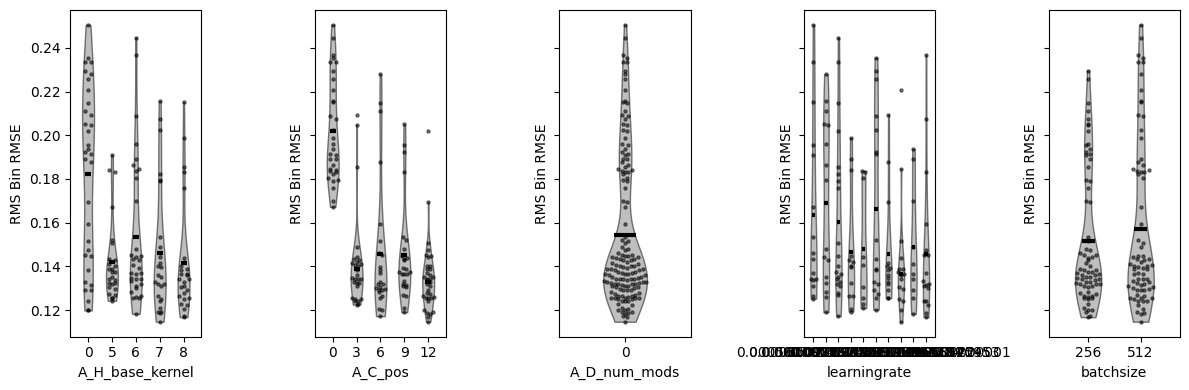

In [ ]:
subs = ['A_H_base_kernel', 'A_C_pos', 'A_D_num_mods', 'learningrate', 'batchsize']

vals = [[v[sub] for k,v in noass_cando.items()] for sub in subs]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_noass[sub][0]] for sub,val in zip(subs,vals)]

scores = [[noass_cansbests_allmets_comb_eval[x] for x in idx] for idx in idxs]

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_noass[sub][0] for sub in subs],
                             'xlabel': subs}, 
                             'figsize': (12, 4), 
            'sharey': True}

MultiPlot(scores, **mp_args_vp)

In [ ]:
# #Getting the same candict as the siamese one

# ROO_SIAM = PickleLoad(pn_RO_SIAM + '/Out')

# ROO_NONSIAM = PickleLoad(pn_RO_NONSIAM + '/Out')

# ##################

# ROO_NONSIAM_candict = copy.deepcopy(ROO_SIAM[0])

# for k,v in ROO_NONSIAM_candict[0].items():
#     ROO_NONSIAM_candict[0][k]['A_siamese'] = False
#     ROO_NONSIAM_candict[0][k]['B_siamese'] = False

# ROO_NONSIAM[0] = ROO_NONSIAM_candict

# ##################

# PickleDump(ROO_NONSIAM, pn_RO_NONSIAM + '/Out')

### Predictions 

In [ ]:
ROO_NONSIAM_metro = PickleLoad(pn_RO_NONSIAM + '0/Mets')

upto = 300

NONSIAM_metro = copy.deepcopy(ROO_NONSIAM_metro)

[NONSIAM_metro.pop(k, None) for k in np.arange(budget)[upto:]]

cansbest_idx = np.array([np.argmin([v[0][r] for r in np.arange(RO_repeats)]) for k,v in NONSIAM_metro.items()])
cansbest_idx

array([0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0,
       1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0,
       2, 0, 0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0,
       1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 2,
       0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0,
       1, 2, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0,
       1, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2])

In [ ]:
NONSIAM_cansbests_allmets_comb = []

for k,b in zip(NONSIAM_metro.keys(), cansbest_idx):
    
    pn_t = NewFolder(pn_RO_NONSIAM + '0') + str(k) + '_0_' + str(b)
    pn_preds, pn_mod = (pn_t + s for s in ['_preds.p',  '_Mod.pt'])
    print(pn_mod)

    lmet_combs = TridentPredNMetric(pn_mod, [data_ready[0], data_ready[1]], [data_ready[2]], 
                                        yy1_split_transaug,
                                        bind = data_ready[3], 
                                        pn_preds = pn_preds,
                                        variables = [k],
                                        **tpm_args_NONSIAM)
        
    lmet_combs_rs = [x[-1] for x in lmet_combs[0]]

    print(f'finished {k}')

    NONSIAM_cansbests_allmets_comb.append(lmet_combs_rs)

NONSIAM_cansbests_allmets_comb = np.stack(NONSIAM_cansbests_allmets_comb)

NONSIAM_cansbests_allmets_comb_test = NONSIAM_cansbests_allmets_comb[:, -1]

PickleDump(NONSIAM_cansbests_allmets_comb_test, pn_RO_NONSIAM + 'NONSIAM_cansbests_allmets_comb_test')

./yy1_oyster/ROG_NONSIAM/0/0_0_0_Mod.pt
finished 0
./yy1_oyster/ROG_NONSIAM/0/1_0_0_Mod.pt
finished 1
./yy1_oyster/ROG_NONSIAM/0/2_0_2_Mod.pt
finished 2
./yy1_oyster/ROG_NONSIAM/0/3_0_1_Mod.pt
finished 3
./yy1_oyster/ROG_NONSIAM/0/4_0_2_Mod.pt
finished 4
./yy1_oyster/ROG_NONSIAM/0/5_0_0_Mod.pt
finished 5
./yy1_oyster/ROG_NONSIAM/0/6_0_1_Mod.pt
finished 6
./yy1_oyster/ROG_NONSIAM/0/7_0_1_Mod.pt
finished 7
./yy1_oyster/ROG_NONSIAM/0/8_0_2_Mod.pt
finished 8
./yy1_oyster/ROG_NONSIAM/0/9_0_0_Mod.pt
finished 9
./yy1_oyster/ROG_NONSIAM/0/10_0_0_Mod.pt
finished 10
./yy1_oyster/ROG_NONSIAM/0/11_0_2_Mod.pt
finished 11
./yy1_oyster/ROG_NONSIAM/0/12_0_2_Mod.pt
finished 12
./yy1_oyster/ROG_NONSIAM/0/13_0_1_Mod.pt
finished 13
./yy1_oyster/ROG_NONSIAM/0/14_0_2_Mod.pt
finished 14
./yy1_oyster/ROG_NONSIAM/0/15_0_2_Mod.pt
finished 15
./yy1_oyster/ROG_NONSIAM/0/16_0_0_Mod.pt
finished 16
./yy1_oyster/ROG_NONSIAM/0/17_0_0_Mod.pt
finished 17
./yy1_oyster/ROG_NONSIAM/0/18_0_1_Mod.pt
finished 18
./yy1_oyster/

### Archi 

In [ ]:
NONSIAM_cando = ROO_NONSIAM[0][0]

vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }

tups = [('Mann-Whitney U', 'p-val'),
        ('Mann-Whitney U', 'sig.'),
        ('RMS', ''),
        ('Indiv. Paired', 'mean'),
        ('Indiv. Paired', 'SE')]

def boldo(x): 
    if x[('Mann-Whitney U', 'sig.')] == True: 
        return ['font-weight: bold'] * len(x) 
    else: return [''] * len(x)

#### A

array([<Axes: xlabel='A_H_base_kernel', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='A_C_pos', ylabel='RMS Bin RMSE'>,
       <Axes: xlabel='A_D_num_mods', ylabel='RMS Bin RMSE'>], dtype=object)

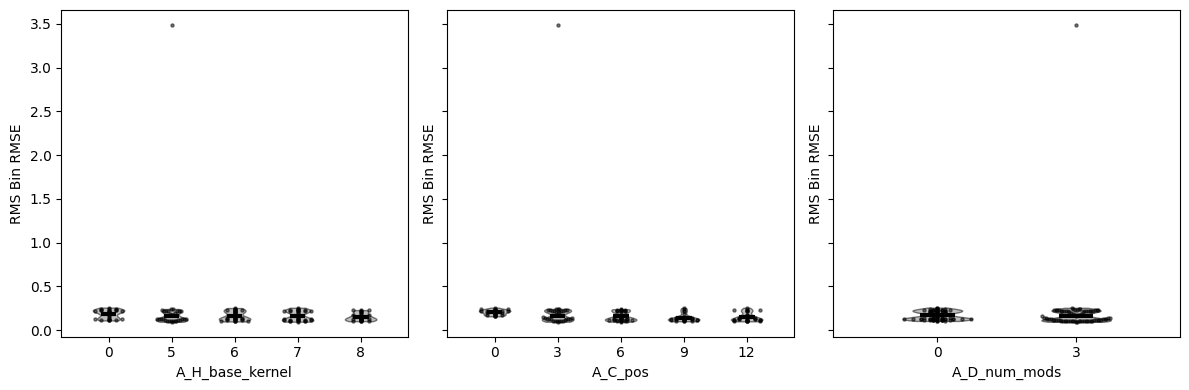

In [ ]:
subs = ['A_H_base_kernel', 'A_C_pos', 'A_D_num_mods']

vals = [[v[sub] for k,v in NONSIAM_cando.items()] for sub in subs]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_NONSIAM[sub][0]] for sub,val in zip(subs,vals)]

scores = [[NONSIAM_cansbests_allmets_comb_test[x] for x in idx] for idx in idxs]

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_NONSIAM[sub][0] for sub in subs],
                             'xlabel': subs}, 
                             'figsize': (12, 4), 
            'sharey': True}

MultiPlot(scores, **mp_args_vp)

In [ ]:
for sub, sco in zip(subs, scores): 
    

       xo = Dual_Oyster_RO_NONSIAM[sub][0]

       rmz = [[(RMS_mode[0](f1, **RMS_mode[1]) - RMS_mode[0](f2, **RMS_mode[1])) / RMS_mode[0](f2, **RMS_mode[1]) * 100 
              for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

       pair_rel = [[PairwiseFuncer(f1, f2, [RelativeChange, {'perc': True}])
              for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

       dict1 = {g1: {g2: {'pval': stats_mode[0](f1, f2, **stats_mode[1])[1],
                            'sig': stats_mode[0](f1, f2, **stats_mode[1])[1] < stats_thresh,
                     'RMS': rmz[if1][if2],
                     'mean': np.mean(pair_rel[if1][if2]),
                     'std': np.std(pair_rel[if1][if2])}
                     
                     for if2, (g2, f2) in enumerate(zip(xo, sco))} for if1, (g1, f1) in enumerate(zip(xo, sco))}

       pdx = pd.concat({k: pd.DataFrame.from_dict(v).T for k, v in dict1.items()}, axis=0)
       multcol = pd.MultiIndex.from_tuples(tups)

       pdx.columns = multcol
       pdx.index.names = [sub, sub]#pd.MultiIndex.from_tuples([(sub, ''), (sub, '')], names = ['f', 'g'])

       pdx = pdx.style.format(precision=4).apply(boldo, axis = 1)

       display(pdx)


NameError: name 'stats_mode' is not defined

#### B

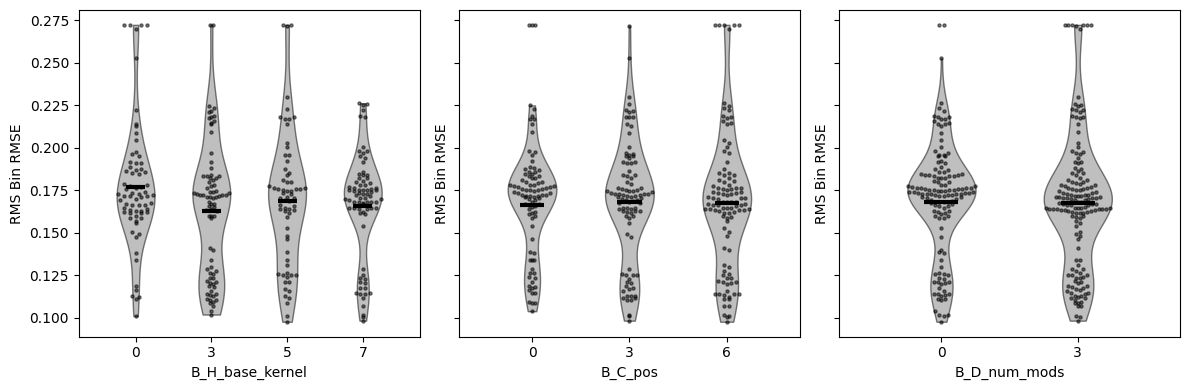

In [ ]:
subs = ['B_H_base_kernel', 'B_C_pos', 'B_D_num_mods']

vals = [[v[sub] for k,v in NONSIAM_cando.items()] for sub in subs]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_NONSIAM[sub][0]] for sub,val in zip(subs,vals)]

scores = [[NONSIAM_cansbests_allmets_comb_test[x] for x in idx] for idx in idxs]

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_NONSIAM[sub][0] for sub in subs],
                             'xlabel': subs}, 
                             'figsize': (12, 4), 
            'sharey': True}

MultiPlot(scores, **mp_args_vp)

In [ ]:
for sub, sco in zip(subs, scores): 
    

       xo = Dual_Oyster_RO_NONSIAM[sub][0]

       rmz = [[(RMS_mode[0](f1, **RMS_mode[1]) - RMS_mode[0](f2, **RMS_mode[1])) / RMS_mode[0](f2, **RMS_mode[1]) * 100 
              for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

       pair_rel = [[PairwiseFuncer(f1, f2, [RelativeChange, {'perc': True}])
              for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

       dict1 = {g1: {g2: {'pval': stats_mode[0](f1, f2, **stats_mode[1])[1],
                            'sig': stats_mode[0](f1, f2, **stats_mode[1])[1] < stats_thresh,
                     'RMS': rmz[if1][if2],
                     'mean': np.mean(pair_rel[if1][if2]),
                     'std': np.std(pair_rel[if1][if2])}
                     
                     for if2, (g2, f2) in enumerate(zip(xo, sco))} for if1, (g1, f1) in enumerate(zip(xo, sco))}

       pdx = pd.concat({k: pd.DataFrame.from_dict(v).T for k, v in dict1.items()}, axis=0)
       multcol = pd.MultiIndex.from_tuples(tups)

       pdx.columns = multcol
       pdx.index.names = [sub, sub]

       pdx = pdx.style.format(precision=4).apply(boldo, axis = 1)

       display(pdx)


#### k-mer ass vs no ass

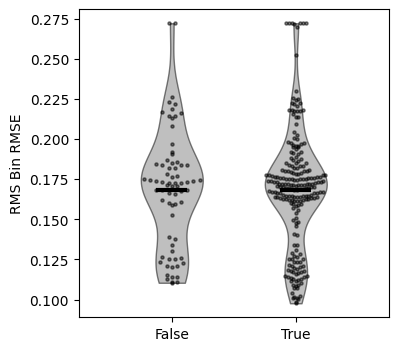

In [ ]:
ROO_NONSIAM = PickleLoad(pn_RO_NONSIAM + '/Out')

NONSIAM_cando = ROO_NONSIAM[0][0]

sub1, sub2 = 'A_D_num_mods', 'B_D_num_mods'

subx = [False, True]

vals = [(v[sub1], v[sub2]) for k,v in NONSIAM_cando.items()]

idxs_noka = np.where(np.product((np.array(vals) == (0, 0)), axis = 1))[0]
idxs_ka = np.array([n for n in np.arange(len(vals)) if n not in idxs_noka])

scores = [NONSIAM_cansbests_allmets_comb_test[x] for x in [idxs_noka, idxs_ka]]


ViolinPlot(scores, **vp_args, label = subx, figsize = (4, 4))

In [ ]:


sub = 'KA'
sco = scores
xo = subx

rmz = [[(RMS_mode[0](f1, **RMS_mode[1]) - RMS_mode[0](f2, **RMS_mode[1])) / RMS_mode[0](f2, **RMS_mode[1]) * 100 
        for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

pair_rel = [[PairwiseFuncer(f1, f2, [RelativeChange, {'perc': True}])
        for if2, f2 in enumerate(sco)] for if1, f1 in enumerate(sco)]

dict1 = {g1: {g2: {'pval': stats_mode[0](f1, f2, **stats_mode[1])[1],
                    'sig': stats_mode[0](f1, f2, **stats_mode[1])[1] < stats_thresh,
                'RMS': rmz[if1][if2],
                'mean': np.mean(pair_rel[if1][if2]),
                'std': np.std(pair_rel[if1][if2])}
                
                for if2, (g2, f2) in enumerate(zip(xo, sco))} for if1, (g1, f1) in enumerate(zip(xo, sco))}

pdx = pd.concat({k: pd.DataFrame.from_dict(v).T for k, v in dict1.items()}, axis=0)
multcol = pd.MultiIndex.from_tuples(tups)

pdx.columns = multcol
pdx.index.names = [sub, sub]

pdx = pdx.style.format(precision=4).apply(boldo, axis = 1)

display(pdx)

# Best of Random Opt

In [ ]:
pn_RO_NONSIAM = NewFolder(pn_oys + 'ROG_NONSIAM')

ROO_NONSIAM = PickleLoad(pn_RO_NONSIAM + '/Out')

NONSIAM_cando = ROO_NONSIAM[0][0]

sub1, sub2 = 'A_D_num_mods', 'B_D_num_mods'

subx = ['NoKA', 'KA']

vals = [(v[sub1], v[sub2]) for k,v in NONSIAM_cando.items()]

idxs_noka = np.where(np.product((np.array(vals) == (0, 0)), axis = 1))[0]
print(idxs_noka)


[  0   4   7  29  30  32  34  39  40  43  47  49  51  53  61  65  66  68
  77  79  84  86  95  97 102 103 106 109 114 121 125 130 131 137 145 168
 169 172 173 179 180 186 193 202 203 208 209 211 215 224 227 230 234 235
 240 246 249 250 257 258 262 266 272 274 275 277 283 292 293 294 296 298]


In [ ]:
pn_RO_NONSIAM_bests = NewFolder(pn_RO_NONSIAM + 'ROG_bests')

num_best = 5 

#The following gets the ones from RO to a new folder like in repeater format. 
RO_NONSIAM_bests_idx, RO_NONSIAM_bests_cans = GetFromOpts(pn_RO_NONSIAM, pn_RO_NONSIAM_bests, 
                                                          fromidxs = idxs_noka,
                                                          num_best = num_best, R_func = True, smallest = True)

In [ ]:
RO_NONSIAM_bests_cans

{0: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_H_grouped': False,
  'B_H_grouped': True,
  'A_doublestrand': True,
  'A_joint': True,
  'A_siamese': False,
  'A_H_size': 12,
  'A_H_filt_m': 158,
  'A_H_ns_filters': 1.1687209465088428,
  'A_H_base_kernel': 5,
  'A_H_1x1': True,
  'A_C_pos': 9,
  'A_D_num_mods': 0,
  'A_D_ns_filters': 2,
  'B_doublestrand': True,
  'B_joint': False,
  'B_siamese': False,
  'B_H_size': 10,
  'B_H_filt_m': 13,
  'B_H_ns_filters': 1.1155472152100177,
  'B_H_base_kernel': 0,
  'B_H_1x1': False,
  'B_C_pos': 6,
  'B_D_num_mods': 0,
  'B_D_ns_filters': 0.5,
  'C_pool_func': torch.nn.modules.pooling.AvgPool2d,
  'activations': ReLU(),
  'batchnorm': 'before',
  'batchsize': 512,
  'learningrate': 0.001280099334550138},
 1: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_H_grouped': False,
  'B_H_grouped': True,
  'A_doublestrand': False,
  'A_joint': True,
  'A_siamese': False,
  'A_H_size': 15,
 

In [ ]:
RO_NONSIAM_bests_variables = ['Candidate']

cando = np.arange(num_best) 

RO_NONSIAM_bests_combs = []
for ca in cando:
    RO_NONSIAM_bests_combs.append([ca])
RO_NONSIAM_bests_combs = [[ic, c] for ic,c in enumerate(RO_NONSIAM_bests_combs)]
RO_NONSIAM_bests_combs

[[0, [0]], [1, [1]], [2, [2]], [3, [3]], [4, [4]]]

In [ ]:
for ic, c in RO_NONSIAM_bests_combs:

    ca = c[0]

    pn_t = pn_RO_NONSIAM_bests + str(ic)

    TCR_args_RO_NONSIAM_bests = TCR_args_RO_NONSIAM.copy()
    TCR_args_RO_NONSIAM_bests.update({'pathname': pn_t})

    _, _= TridentCanRepeater(Dual_Oyster_v4, RO_NONSIAM_bests_cans[ca], data_ready, **TCR_args_RO_NONSIAM_bests)

 Cross val 1 of 1, Repeat 1 of 15
0.10323093539223192
 Cross val 1 of 1, Repeat 2 of 15
0.10096460269044005
 Cross val 1 of 1, Repeat 3 of 15
0.10421619581986351
 Cross val 1 of 1, Repeat 4 of 15
0.10751228423949258
 Cross val 1 of 1, Repeat 5 of 15
0.10190637954910514
 Cross val 1 of 1, Repeat 6 of 15
0.10513243831458229
 Cross val 1 of 1, Repeat 7 of 15
0.10492611925350737
 Cross val 1 of 1, Repeat 8 of 15
0.10997066696142008
 Cross val 1 of 1, Repeat 9 of 15
0.10290347643015142
 Cross val 1 of 1, Repeat 10 of 15
0.1057223934633325
 Cross val 1 of 1, Repeat 11 of 15
0.10439466723102246
 Cross val 1 of 1, Repeat 12 of 15
0.10527821323871807
 Cross val 1 of 1, Repeat 13 of 15
0.10275006258329895
 Cross val 1 of 1, Repeat 14 of 15
E 5 Training: nan Validation: 0.18774999691866404 Counter 3
E 6 Training: nan Validation: 0.18164691516793185 Counter 4
E 7 Training: nan Validation: 0.18809755689947685 Counter 5
E 8 Training: nan Validation: 0.12825437008858928 Counter 0
E 9 Training: nan Va

In [ ]:
RO_NONSIAM_bests_allmets_comb = []

for ic, c in RO_NONSIAM_bests_combs:

    RO_NONSIAM_bests_units = []

    for ir in range(repeats): 
        
        pn_t = NewFolder(pn_RO_NONSIAM_bests + str(ic)) + '0_' + str(ir) 
        pn_preds, pn_mod = (pn_t + s for s in ['_preds.p',  '_Mod.pt'])

        lmet_combs = TridentPredNMetric(pn_mod, [data_ready[0], data_ready[1]], [data_ready[2]], 
                                        yy1_split_transaug,
                                        bind = data_ready[3], 
                                        pn_preds = pn_preds,
                                        variables = c,
                                        **tpm_args_NONSIAM) ####################################
        
        lmet_combs_rs = [x[-1] for x in lmet_combs[0]]

        RO_NONSIAM_bests_units.append(lmet_combs_rs)
        
        print(f'finished {ic, ir}')
    
    RO_NONSIAM_bests_allmets_comb.append(RO_NONSIAM_bests_units)
            
pickle.dump(RO_NONSIAM_bests_allmets_comb, open(pn_RO_NONSIAM_bests + 'RO_NONSIAM_bests_allmets_comb' + '.p', 'wb'))

finished (0, 0)
finished (0, 1)
finished (0, 2)
finished (0, 3)
finished (0, 4)
finished (0, 5)
finished (0, 6)
finished (0, 7)
finished (0, 8)
finished (0, 9)
finished (0, 10)
finished (0, 11)
finished (0, 12)
finished (0, 13)
finished (0, 14)
finished (1, 0)
finished (1, 1)
finished (1, 2)
finished (1, 3)
finished (1, 4)
finished (1, 5)
finished (1, 6)
finished (1, 7)
finished (1, 8)
finished (1, 9)
finished (1, 10)
finished (1, 11)
finished (1, 12)
finished (1, 13)
finished (1, 14)
finished (2, 0)
finished (2, 1)
finished (2, 2)
finished (2, 3)
finished (2, 4)
finished (2, 5)
finished (2, 6)
finished (2, 7)
finished (2, 8)
finished (2, 9)
finished (2, 10)
finished (2, 11)
finished (2, 12)
finished (2, 13)
finished (2, 14)
finished (3, 0)
finished (3, 1)
finished (3, 2)
finished (3, 3)
finished (3, 4)
finished (3, 5)
finished (3, 6)
finished (3, 7)
finished (3, 8)
finished (3, 9)
finished (3, 10)
finished (3, 11)
finished (3, 12)
finished (3, 13)
finished (3, 14)
finished (4, 0)
fini

In [ ]:
top = 12

RO_NONSIAM_bests_allmets_comb = pickle.load(open(pn_RO_NONSIAM_bests + 'RO_NONSIAM_bests_allmets_comb' + '.p', 'rb'))

RO_NONSIAM_bests_allmets_comb = np.stack(RO_NONSIAM_bests_allmets_comb)

top = 12
v = 1 #validation set now... 

sampx_top = np.stack([x[np.argsort(x[:, v].reshape(-1))[:top]] for x in RO_NONSIAM_bests_allmets_comb])

sampx_top_test = sampx_top[:, :, -1]

sampx_pairtests = [[stats_mode[0](f1, f2, **stats_mode[1])[1] for f2 in sampx_top_test] for f1 in sampx_top_test]

gogo = np.stack(sampx_pairtests)

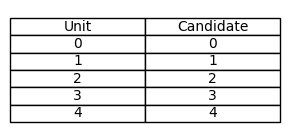

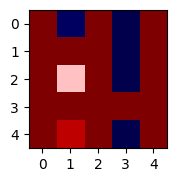

In [ ]:
TablePlot([[ix] + x[1] for ix, x in enumerate(RO_NONSIAM_bests_combs)], 
          colLabels=['Unit', *RO_NONSIAM_bests_variables], 
          figsize = ((len(RO_NONSIAM_bests_variables) + 1) * tp1, 
                     (len(RO_NONSIAM_bests_combs) + 1) * tp2))


figer = ((1 * 2) + 1) * fp * 2
labs = np.arange(len(RO_NONSIAM_bests_combs))

gp_argsX = {**gp_args, 'xticklabel': labs, 'yticklabel': labs}

GridPlot(gogo, **gp_argsX, figsize = (figer, figer))

In [ ]:
bestoysters = [0] #ONLY USING ONE FOR NOW. 

oyster_configs = {b: RO_NONSIAM_bests_cans[b] for b in bestoysters}
PickleDump(oyster_configs, pn_RO_NONSIAM_bests + 'oyster_configs')

oyster_configs

{0: {'A_dim_i': (1, 500, 4),
  'B_dim_i': (11, 40, 1),
  'dim_f': (1, 1, 1),
  'A_H_grouped': False,
  'B_H_grouped': True,
  'A_doublestrand': True,
  'A_joint': True,
  'A_siamese': False,
  'A_H_size': 12,
  'A_H_filt_m': 158,
  'A_H_ns_filters': 1.1687209465088428,
  'A_H_base_kernel': 5,
  'A_H_1x1': True,
  'A_C_pos': 9,
  'A_D_num_mods': 0,
  'A_D_ns_filters': 2,
  'B_doublestrand': True,
  'B_joint': False,
  'B_siamese': False,
  'B_H_size': 10,
  'B_H_filt_m': 13,
  'B_H_ns_filters': 1.1155472152100177,
  'B_H_base_kernel': 0,
  'B_H_1x1': False,
  'B_C_pos': 6,
  'B_D_num_mods': 0,
  'B_D_ns_filters': 0.5,
  'C_pool_func': torch.nn.modules.pooling.AvgPool2d,
  'activations': ReLU(),
  'batchnorm': 'before',
  'batchsize': 512,
  'learningrate': 0.001280099334550138}}

In [ ]:
bestoys_config = copy.deepcopy(oyster_configs[0])
[bestoys_config.pop(x) for x in ['learningrate', 'batchsize']]

OysX = Dual_Oyster_v4(**bestoys_config)
print(OysX)

Dual_Oyster_v4(
  (ReflectA): ReflectLayer()
  (HA): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 4), stride=(1, 4), padding=valid)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 67, kernel_size=(5, 1), stride=(1, 1), padding=valid)
    (4): BatchNorm2d(67, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(67, 109, kernel_size=(4, 1), stride=(1, 1), padding=valid)
    (7): BatchNorm2d(109, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
  (OA): Sequential(
    (0): Conv2d(109, 158, kernel_size=(1, 1), stride=(1, 1), padding=valid)
    (1): BatchNorm2d(158, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (JA): Sequential(
    (0): FlipLayer()
    (1): WWPLayer()
  )
  (CA): Sequential(
    (0): AvgPool2d(kernel_size=(55, 1), stride=(55, 1), padding=(3, 0))
  )
  (DA): Sequential(
    (0

## SIAMESE

In [ ]:
pn_RO_SIAM = NewFolder(pn_oys + 'ROG_SIAM')

In [ ]:
Dual_Oyster_RO_SIAM = Dual_Oyster_v4_basic.copy()

Dual_Oyster_RO_SIAM.update({

    'A_dim_i': [[data_ready[0].shape[1:]],'cat'],
    'B_dim_i': [[data_ready[1].shape[1:]],'cat'],
    'dim_f': [[data_ready[2].shape[1:]],'cat'],

    'A_H_grouped': [[False], 'cat'], #DOESNT MATTER
    'B_H_grouped': [[True], 'cat'], # WE WANT GROUPED NOW! 
    
    'A_doublestrand': [[True, False], 'cat'],
    'A_joint': [[True, False], 'cat'], 
    'A_siamese': [[True], 'cat'], #############################

    'A_H_filt_m': [[50, 250], 'int'],
    'A_H_base_kernel': [[0, 5, 6, 7, 8], 'cat'],
    
    'A_C_pos': [np.arange(0, 15)[::3], 'cat'], 
    'A_D_num_mods': [[0, 3], 'cat'],

    'B_doublestrand': [[True, False], 'cat'],
    'B_joint': [[False], 'cat'], ################# NEVER JOINT FOR SINGLE SIGNAL. 
    'B_siamese': [[True], 'cat'], #############################

    'B_H_size': [[7, 15], 'int'], 
    'B_H_filt_m': [[10, 25], 'int'],

    'B_H_base_kernel': [[0, 3, 5, 7], 'cat'],

    'B_C_pos': [np.arange(0, 7)[::3], 'cat'],
    'B_D_num_mods': [[0, 3], 'cat'],

    'batchsize': [[256, 512], 'cat'], #############################
    'learningrate': [[0.0001, 0.1], 'float']}) ####################

In [ ]:
# #ALLLLLL GOOOOODDD

# shins, shout = [[10, *data_ready[0].shape[1:]], [10, *data_ready[1].shape[1:]]], (10, *data_ready[2].shape[1:])

# workz, noworks = MakeSureWorks(Dual_Oyster_v4, Dual_Oyster_RO_SIAM, shins, shout, 
#                                multi_in = True, 
#                                cands = 1000, 
#                                notmodel = ['batchsize', 'learningrate']) 

# noworks[:10]

In [ ]:
budget = 300

RO_repeats = 3

RO_args_SIAM = {'algo': Dual_Oyster_v4, 'VarDict': Dual_Oyster_RO_SIAM, 
           'data': data_ready, 
           'Splits': yy1_split_transaug, #Doing epoch undersampling so full split. 
           'budget': budget, 'repeats': RO_repeats, 
           'CS_mode': [TridentCanScorer, {'trainer': Trainer_basic, 
                                          'trainer_args': TB_args_RO_SIAM}], 
           'pickup': True, 'pathname': pn_RO_SIAM, 'savemodels': True}

In [ ]:
ROO_SIAM = RandomOpt(**RO_args_SIAM)

### Predictions

In [ ]:
cansbest_idx = np.array([np.argmin([v[0][r] for r in np.arange(RO_repeats)]) for k,v in ROO_SIAM[1][0].items()])

In [ ]:
SIAM_cansbests_allmets_comb = []

for k,b in zip(ROO_SIAM[1][0].keys(), cansbest_idx):
    
    pn_t = NewFolder(pn_RO_SIAM + '0') + str(k) + '_0_' + str(b)
    pn_preds, pn_mod = (pn_t + s for s in ['_preds.p',  '_Mod.pt'])
    print(pn_mod)

    lmet_combs = TridentPredNMetric(pn_mod, [data_ready[0], data_ready[1]], [data_ready[2]], 
                                        yy1_split_transaug,
                                        bind = data_ready[3], 
                                        pn_preds = pn_preds,
                                        variables = [k],
                                        **tpm_args_SIAM)
        
    lmet_combs_rs = [x[-1] for x in lmet_combs[0]]

    print(f'finished {k}')

    SIAM_cansbests_allmets_comb.append(lmet_combs_rs)

SIAM_cansbests_allmets_comb = np.stack(SIAM_cansbests_allmets_comb)

SIAM_cansbests_allmets_comb_test = SIAM_cansbests_allmets_comb[:, -1]

PickleDump(SIAM_cansbests_allmets_comb_test, pn_RO_SIAM + 'SIAM_cansbests_allmets_comb_test')

./yy1_oyster/ROG_SIAM/0/0_0_0_Mod.pt
finished 0
./yy1_oyster/ROG_SIAM/0/1_0_0_Mod.pt
finished 1
./yy1_oyster/ROG_SIAM/0/2_0_1_Mod.pt
finished 2
./yy1_oyster/ROG_SIAM/0/3_0_1_Mod.pt
finished 3
./yy1_oyster/ROG_SIAM/0/4_0_1_Mod.pt
finished 4
./yy1_oyster/ROG_SIAM/0/5_0_1_Mod.pt
finished 5
./yy1_oyster/ROG_SIAM/0/6_0_1_Mod.pt
finished 6
./yy1_oyster/ROG_SIAM/0/7_0_1_Mod.pt
finished 7
./yy1_oyster/ROG_SIAM/0/8_0_0_Mod.pt
finished 8
./yy1_oyster/ROG_SIAM/0/9_0_0_Mod.pt
finished 9
./yy1_oyster/ROG_SIAM/0/10_0_0_Mod.pt
finished 10
./yy1_oyster/ROG_SIAM/0/11_0_1_Mod.pt
finished 11
./yy1_oyster/ROG_SIAM/0/12_0_2_Mod.pt
finished 12
./yy1_oyster/ROG_SIAM/0/13_0_2_Mod.pt
finished 13
./yy1_oyster/ROG_SIAM/0/14_0_0_Mod.pt
finished 14
./yy1_oyster/ROG_SIAM/0/15_0_2_Mod.pt
finished 15
./yy1_oyster/ROG_SIAM/0/16_0_1_Mod.pt
finished 16
./yy1_oyster/ROG_SIAM/0/17_0_2_Mod.pt
finished 17
./yy1_oyster/ROG_SIAM/0/18_0_2_Mod.pt
finished 18
./yy1_oyster/ROG_SIAM/0/19_0_1_Mod.pt
finished 19
./yy1_oyster/ROG_SIA

### Explore Archi

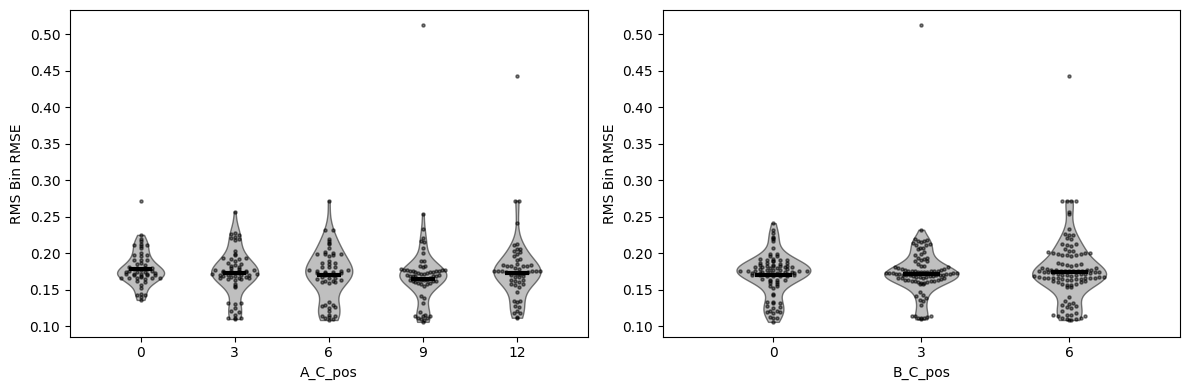

In [ ]:
SIAM_cando = ROO_SIAM[0][0]

sub1, sub2 = 'A_C_pos', 'B_C_pos'

vals = [[v[sub] for k,v in SIAM_cando.items()] for sub in [sub1, sub2]]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_SIAM[sub][0]] for sub,val in zip([sub1, sub2],vals)]

scores = [[SIAM_cansbests_allmets_comb_test[x] for x in idx] for idx in idxs]


vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_SIAM[sub1][0], Dual_Oyster_RO_SIAM[sub2][0]],
                             'xlabel': [sub1, sub2]}, 
                             'figsize': (12, 4)
                             
                             }

MultiPlot(scores, **mp_args_vp)

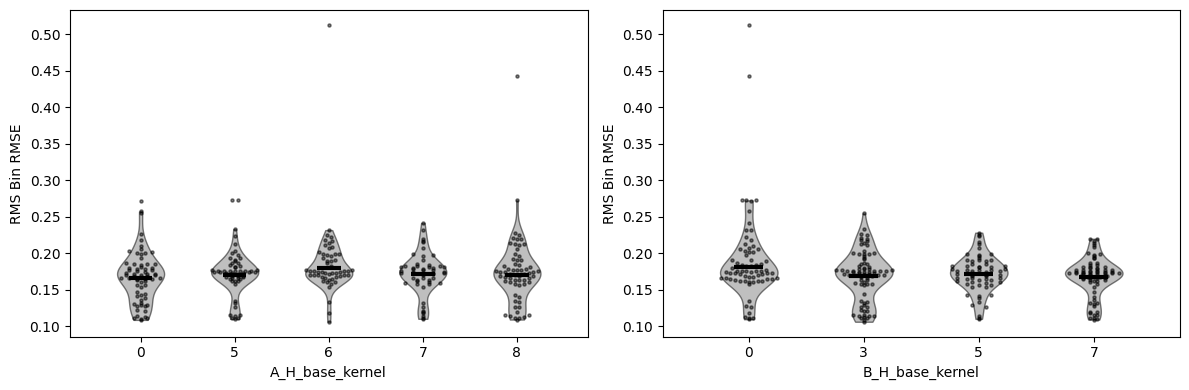

In [ ]:
SIAM_cando = ROO_SIAM[0][0]

sub1, sub2 = 'A_H_base_kernel', 'B_H_base_kernel'

vals = [[v[sub] for k,v in SIAM_cando.items()] for sub in [sub1, sub2]]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_SIAM[sub][0]] for sub,val in zip([sub1, sub2],vals)]

scores = [[SIAM_cansbests_allmets_comb_test[x] for x in idx] for idx in idxs]


vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_SIAM[sub1][0], Dual_Oyster_RO_SIAM[sub2][0]],
                             'xlabel': [sub1, sub2]}, 
                             'figsize': (12, 4)
                             
                             }

MultiPlot(scores, **mp_args_vp)

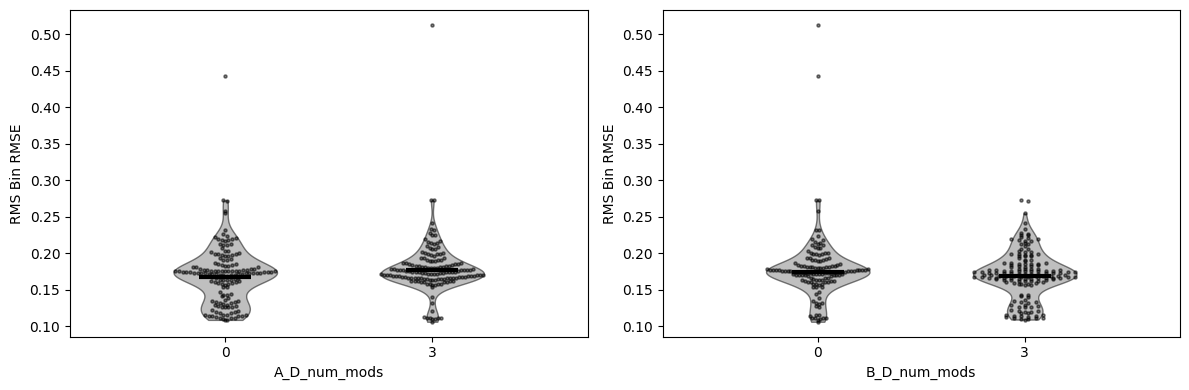

In [ ]:
SIAM_cando = ROO_SIAM[0][0]

sub1, sub2 = 'A_D_num_mods', 'B_D_num_mods'

vals = [[v[sub] for k,v in SIAM_cando.items()] for sub in [sub1, sub2]]

idxs = [[np.where(np.array(val) == b)[0] for b in Dual_Oyster_RO_SIAM[sub][0]] for sub,val in zip([sub1, sub2],vals)]

scores = [[SIAM_cansbests_allmets_comb_test[x] for x in idx] for idx in idxs]


vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }

mp_args_vp = {'multi': True, 'transpose': True,
              'plt_mode': [ViolinPlot, vp_args], 
              'indiv_args': {'label': [Dual_Oyster_RO_SIAM[sub1][0], Dual_Oyster_RO_SIAM[sub2][0]],
                             'xlabel': [sub1, sub2]}, 
                             'figsize': (12, 4)
                             
                             }

MultiPlot(scores, **mp_args_vp)

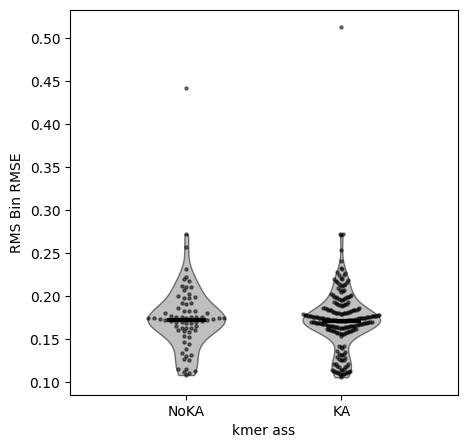

In [ ]:
SIAM_cando = ROO_SIAM[0][0]

sub1, sub2 = 'A_D_num_mods', 'B_D_num_mods'

subx = ['NoKA', 'KA']

vals = [(v[sub1], v[sub2]) for k,v in SIAM_cando.items()]

idxs = [np.where(np.product((np.array(vals) == (0, 0)), axis = 1))[0], 
        np.where(np.product((np.array(vals) == (0, 0)), axis = 1) == 0)[0]]

scores = [SIAM_cansbests_allmets_comb_test[x] for x in idxs]

vp_args = {'no_outliers': True, 'rej_outliers': 3,
           'widths': 0.5, 'colors': 'Gray', 'cmap': None, 'alpha': 0.5,
           'ylabel': metro, 
           'swarm': True, 'swarm_ps': 5, 'swarm_alpha': 0.5, 'swarm_bins': 50 }


ViolinPlot(scores, **vp_args, xlabel = 'kmer ass', label = subx)


In [ ]:
[np.min(sco) for sco in scores]

[0.10857142255985497, 0.10604102040494703]

# Siamese vs Non-Siamese

In [ ]:
NONSIAM_cansbests_allmets_comb_test = PickleLoad(pn_RO_NONSIAM + 'NONSIAM_cansbests_allmets_comb_test')

SIAM_cansbests_allmets_comb_test = PickleLoad(pn_RO_SIAM + 'SIAM_cansbests_allmets_comb_test')

In [ ]:
SIAM_cansbests_allmets_comb_test_mini = SIAM_cansbests_allmets_comb_test[:upto]

In [ ]:
np.mean(NONSIAM_cansbests_allmets_comb_test / SIAM_cansbests_allmets_comb_test_mini)

0.9749778430537822

In [ ]:
lex = len(NONSIAM_cansbests_allmets_comb_test)
selo = 100000

resoz = [] 

for _ in np.arange(1000): 

    cho = np.random.choice(np.arange(lex), selo)


    NONSIAM_randos = NONSIAM_cansbests_allmets_comb_test[cho]
    SIAM_randos = SIAM_cansbests_allmets_comb_test[cho]

    resoz.append(np.mean(NONSIAM_randos / SIAM_randos))

print(np.mean(resoz))



0.9749786099825389


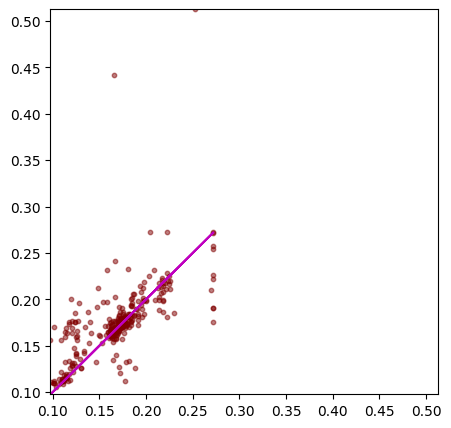

In [ ]:
ScaPlot([NONSIAM_cansbests_allmets_comb_test, SIAM_cansbests_allmets_comb_test_mini], 
        alpha = 0.5, sharebounds = True, line = True)

In [ ]:
NONSIAM_cansbests_allmets_comb_test.max()

0.2721780540042762